Final Project - Sign Language MNIST

In [ ]:
# get tensorflow 2.0 (run once per session)
pip install tensorflow==2.0

In [153]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print('tensorflow version: ' + tf.__version__)

tensorflow version: 2.0.0


In [19]:
from np_utils import to_categorical

ImportError: cannot import name 'to_categorical' from 'np_utils' (C:\Users\Altaf\Anaconda3\lib\site-packages\np_utils\__init__.py)

In [21]:
tensorflow.keras.__version__

NameError: name 'tensorflow' is not defined

In [4]:
import seaborn as sns

from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [6]:
from sklearn.preprocessing import LabelBinarizer

In [7]:
import os
os.getcwd()

'C:\\Users\\Altaf\\Documents\\Machine Learning and Imaging'

In [8]:
os.chdir('C:\\Users\\Altaf\\Documents\\Machine Learning and Imaging\\sign_mnist')

# Data Preprocessing

In [32]:
train_data = pd.read_csv('sign_mnist_train.csv')


In [33]:
y_train = train_data.label
x_train = train_data.drop('label',axis=1, inplace = True)

In [34]:
test_data = pd.read_csv('sign_mnist_test.csv')


In [35]:
y_test = test_data.label
x_test = test_data.drop('label',axis=1, inplace = True)

In [17]:
len(train_data)

27455

In [18]:
len(test_data)

7172

In [19]:
(27455/(27455+7172))*100

79.28783896959021

In [20]:
(7172/(27455+7172))*100

20.712161030409796

In [36]:
x_train = train_data.values
x_train = np.array([np.reshape(i, (28, 28)) for i in x_train])
x_train = np.array([i.flatten() for i in x_train])

In [ ]:
y_train = train_data.label
y_train = label_binrizer.fit_transform(y_train)

x_train = train_data.values
x_train = np.array([np.reshape(i, (28, 28)) for i in x_train])
x_train = np.array([i.flatten() for i in x_train])



y_test = test_data.label
y_test = label_binrizer.fit_transform(y_test)

x_test = test_data.values
x_test = np.array([np.reshape(i, (28, 28)) for i in x_test])
x_test = np.array([i.flatten() for i in x_test])

# Split training set into 10% validation and 90% training
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1, random_state=2)

x_train, x_test = x_train / 255.0, x_test / 255.0
x_valid = x_valid/255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)

In [37]:
label_binrizer = LabelBinarizer()
y_train = label_binrizer.fit_transform(y_train)
#

In [40]:
x_test = test_data.values
x_test = np.array([np.reshape(i, (28, 28)) for i in x_test])
x_test = np.array([i.flatten() for i in x_test])

In [41]:
y_test = label_binrizer.fit_transform(y_test)

In [38]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [42]:
# Split training set into 10% validation and 90% training
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1, random_state=2)

In [43]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [44]:
x_valid = x_valid/255.0

In [45]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)

In [39]:
print(x_train.shape, y_train.shape)
#print(x_test.shape, y_test.shape)

(27455, 784) (27455, 24)


In [40]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961


In [46]:
model_1 = Sequential()
model_1.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model_1.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Dropout(0.25)) # Dropout reduces overfitting
model_1.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model_1.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(24, activation='softmax'))

model_1.compile(optimizer=Adam(lr=0.001) , loss='categorical_crossentropy', metrics=['accuracy'])

In [166]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)         

In [47]:
history_1 = model_1.fit(x_train, y_train, batch_size=64, epochs=12, validation_data=(x_valid,y_valid))

Train on 24709 samples, validate on 2746 samples
Epoch 1/12
24709/24709 [==============================] - 141s 6ms/sample - loss: 1.4440 - accuracy: 0.5509 - val_loss: 0.0593 - val_accuracy: 0.9891
Epoch 2/12
24709/24709 [==============================] - 136s 6ms/sample - loss: 0.1759 - accuracy: 0.9395 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 3/12
24709/24709 [==============================] - 142s 6ms/sample - loss: 0.0788 - accuracy: 0.9740 - val_loss: 8.7234e-04 - val_accuracy: 1.0000
Epoch 4/12
24709/24709 [==============================] - 135s 5ms/sample - loss: 0.0542 - accuracy: 0.9815 - val_loss: 5.4578e-04 - val_accuracy: 1.0000
Epoch 5/12
24709/24709 [==============================] - 134s 5ms/sample - loss: 0.0443 - accuracy: 0.9853 - val_loss: 2.4515e-04 - val_accuracy: 1.0000
Epoch 6/12
24709/24709 [==============================] - 137s 6ms/sample - loss: 0.0338 - accuracy: 0.9884 - val_loss: 4.4564e-05 - val_accuracy: 1.0000
Epoch 7/12
24709/24709 [===========

In [141]:
results_1 = model_1.predict(x_test)

In [168]:
test1_loss, test1_accuracy = model_1.evaluate(x_test,y_test)

7172/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [169]:
#test accuracy
test1_accuracy

0.9574735

In [194]:
test1_loss

0.22571390953969347

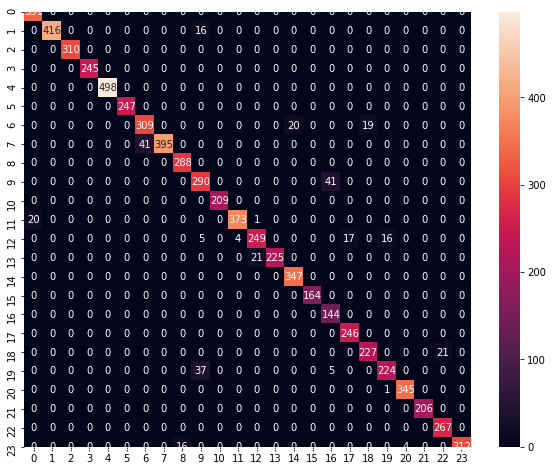

In [184]:
from sklearn.metrics import confusion_matrix
# Convert predictions classes to one hot vectors 
y_pred1 = np.argmax(results_1, axis = 1) 
# Convert validation observations to one hot vectors
y_actual1 = np.argmax(y_test,axis = 1) 
# Create confusion matrix
conf_mtx = confusion_matrix(y_actual1, y_pred1) 
plt.figure(figsize=(10,8))
sns.heatmap(conf_mtx, annot=True, fmt="d")#, ax = set_ylim((bottom, top)));

# Simulation 1: 28x14 images, lower resolution

In [131]:
train_2 = pd.read_csv('sign_mnist_train.csv')
test_2 = pd.read_csv('sign_mnist_test.csv')

In [132]:
y_train2 = train_2.label
x_train2 = train_2.drop('label',axis=1)#, inplace = True)
y_test2 = test_2.label
x_test2 = test_2.drop('label',axis=1)#, inplace = True)

In [133]:
x_test2np = np.asarray(x_test2)

In [134]:
x_train2np = np.asarray(x_train2)

In [135]:
x_test_mod = np.zeros(shape = (7172,392))
for i in range(len(x_test2np)):
    for j in range(0,782,2):
        k = j/2
        x_test_mod[i][int(k)]= ((x_test2np[i][j] + x_test2np[i][j+2])/2)
                


In [114]:
len(x_train2)

27455

In [136]:
x_train_mod = np.zeros(shape = (27455,392))
for i in range(len(x_train2np)):
    for j in range(0,782,2):
        k = j/2
        x_train_mod[i][int(k)]= ((x_train2np[i][j] + x_train2np[i][j+2])/2)
                

In [137]:
y_train2 = label_binrizer.fit_transform(y_train2)
y_test2 = label_binrizer.fit_transform(y_test2)

In [138]:
x_train2_mod = x_train_mod


x_test2_mod = x_test_mod

# Split training set into 10% validation and 90% training
x_tr2, x_vd, y_tr, y_vd = train_test_split(x_train2_mod, y_train2, test_size = 0.1, random_state=2)

x_tr2, x_test2_mod = x_tr2 / 255.0, x_test2_mod / 255.0
x_vd = x_vd/255.0

x_tr2 = x_tr2.reshape(x_tr2.shape[0], 28, 14, 1)
x_test2_mod = x_test2_mod.reshape(x_test2_mod.shape[0], 28, 14, 1)
x_vd = x_vd.reshape(x_vd.shape[0], 28, 14, 1)

In [139]:
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,14,1)))
model_2.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,14,1)))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25)) # Dropout reduces overfitting
model_2.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model_2.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(24, activation='softmax'))

model_2.compile(optimizer=Adam(lr=0.001) , loss='categorical_crossentropy', metrics=['accuracy'])

In [165]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 14, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 7, 32)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 7, 32)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 7, 64)         18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 7, 64)         36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 3, 64)         

In [140]:
history_2 = model_2.fit(x_tr2, y_tr, batch_size=64, epochs=12, validation_data=(x_vd,y_vd))

Train on 24709 samples, validate on 2746 samples
Epoch 1/12
24709/24709 [==============================] - 81s 3ms/sample - loss: 1.5740 - accuracy: 0.5004 - val_loss: 0.2787 - val_accuracy: 0.9279
Epoch 2/12
24709/24709 [==============================] - 75s 3ms/sample - loss: 0.3601 - accuracy: 0.8740 - val_loss: 0.0357 - val_accuracy: 0.9956
Epoch 3/12
24709/24709 [==============================] - 74s 3ms/sample - loss: 0.1737 - accuracy: 0.9389 - val_loss: 0.0108 - val_accuracy: 0.9996
Epoch 4/12
24709/24709 [==============================] - 75s 3ms/sample - loss: 0.1108 - accuracy: 0.9617 - val_loss: 0.0057 - val_accuracy: 0.9993
Epoch 5/12
24709/24709 [==============================] - 75s 3ms/sample - loss: 0.0902 - accuracy: 0.9695 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/12
24709/24709 [==============================] - 77s 3ms/sample - loss: 0.0690 - accuracy: 0.9766 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/12
24709/24709 [==============================] -

In [185]:
results_2 = model_2.predict(x_test2_mod)

In [186]:
test2_loss, test2_accuracy = model_2.evaluate(x_test2_mod,y_test2)

7172/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [187]:
#test accuracy
test2_accuracy

0.90267706

In [195]:
test2_loss

0.4679410858313531

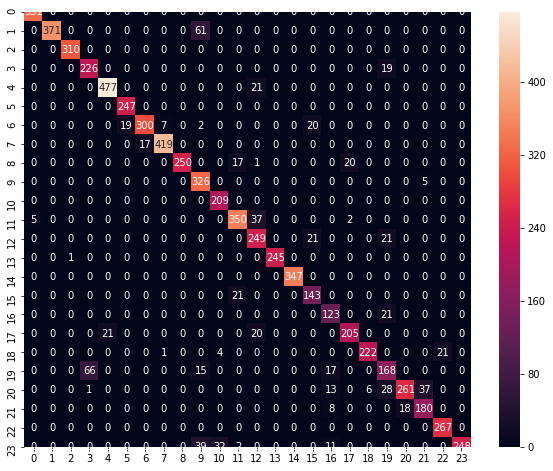

In [188]:
from sklearn.metrics import confusion_matrix
# Convert predictions classes to one hot vectors 
y_pred2 = np.argmax(results_2, axis = 1) 
# Convert validation observations to one hot vectors
y_actual2 = np.argmax(y_test2,axis = 1) 
# Create confusion matrix
conf_mtx2 = confusion_matrix(y_actual2, y_pred2) 
plt.figure(figsize=(10,8))
sns.heatmap(conf_mtx2, annot=True, fmt="d")#, ax = set_ylim((bottom, top)));

In [119]:
x_train_mod.shape

(27455, 392)

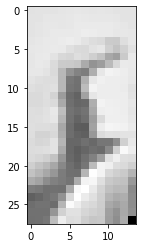

In [110]:
generate_image(x_test_mod[0])

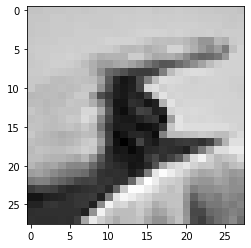

In [193]:
gen_image(x_test[0])

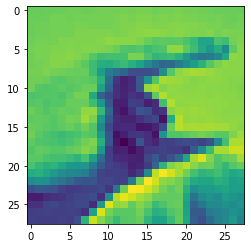

In [164]:
plt.imshow(x_test2np[0].reshape(28,28))

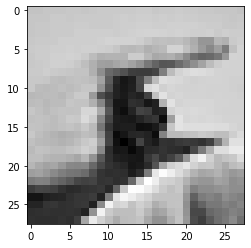

In [113]:
gen_image(np.array(x_test2.iloc[0]))

# Simulation 2: 14x14 images

In [146]:
train_3 = pd.read_csv('sign_mnist_train.csv')
test_3 = pd.read_csv('sign_mnist_test.csv')

In [147]:
y_train3 = train_3.label
x_train3 = train_3.drop('label',axis=1)#, inplace = True)
y_test3 = test_3.label
x_test3 = test_3.drop('label',axis=1)#, inplace = True)

In [148]:
x_test3np = np.asarray(x_test3)
x_train3np = np.asarray(x_train3)

In [153]:
x_train3_mod = np.zeros(shape = (27455,196))
for i in range(len(x_train3np)):
    for j in range(0,782,4):
        k = j/4
        x_train3_mod[i][int(k)]= ((x_train3np[i][j] + x_train3np[i][j+1]+x_train3np[i][j+2]+x_train3np[i][j+3])/4)

In [152]:
x_test3_mod = np.zeros(shape = (7172,196))
for i in range(len(x_test3np)):
    for j in range(0,782,4):
        k = j/4
        x_test3_mod[i][int(k)]= ((x_test3np[i][j] + x_test3np[i][j+1]+x_test3np[i][j+2]+x_test3np[i][j+3])/4)

In [158]:
y_train3 = label_binrizer.fit_transform(y_train3)
y_test3 = label_binrizer.fit_transform(y_test3)

In [159]:
x_train3_mod_copy = x_train3_mod


x_test3_mod_copy = x_test3_mod

# Split training set into 10% validation and 90% training
x_tr3, x_vd3, y_tr3, y_vd3 = train_test_split(x_train3_mod, y_train3, test_size = 0.1, random_state=2)

x_tr3, x_test3_mod = x_tr3 / 255.0, x_test3_mod / 255.0
x_vd3 = x_vd3/255.0

x_tr3 = x_tr3.reshape(x_tr3.shape[0], 14, 14, 1)
x_test3_mod = x_test3_mod.reshape(x_test3_mod.shape[0], 14, 14, 1)
x_vd3 = x_vd3.reshape(x_vd3.shape[0], 14, 14, 1)

In [160]:
model_3 = Sequential()
model_3.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(14,14,1)))
model_3.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(14,14,1)))
model_3.add(MaxPool2D(pool_size=(2,2)))
model_3.add(Dropout(0.25)) # Dropout reduces overfitting
model_3.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model_3.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model_3.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(24, activation='softmax'))

model_3.compile(optimizer=Adam(lr=0.001) , loss='categorical_crossentropy', metrics=['accuracy'])

In [167]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 64)         

In [161]:
history_3 = model_3.fit(x_tr3, y_tr3, batch_size=64, epochs=12, validation_data=(x_vd3,y_vd3))

Train on 24709 samples, validate on 2746 samples
Epoch 1/12
24709/24709 [==============================] - 54s 2ms/sample - loss: 2.0716 - accuracy: 0.3478 - val_loss: 0.7671 - val_accuracy: 0.7440
Epoch 2/12
24709/24709 [==============================] - 46s 2ms/sample - loss: 0.7089 - accuracy: 0.7533 - val_loss: 0.2194 - val_accuracy: 0.9319
Epoch 3/12
24709/24709 [==============================] - 46s 2ms/sample - loss: 0.3774 - accuracy: 0.8680 - val_loss: 0.0921 - val_accuracy: 0.9803
Epoch 4/12
24709/24709 [==============================] - 44s 2ms/sample - loss: 0.2440 - accuracy: 0.9152 - val_loss: 0.0355 - val_accuracy: 0.9913
Epoch 5/12
24709/24709 [==============================] - 46s 2ms/sample - loss: 0.1733 - accuracy: 0.9410 - val_loss: 0.0217 - val_accuracy: 0.9960
Epoch 6/12
24709/24709 [==============================] - 42s 2ms/sample - loss: 0.1368 - accuracy: 0.9531 - val_loss: 0.0110 - val_accuracy: 0.9982
Epoch 7/12
24709/24709 [==============================] -

In [189]:
results_3 = model_3.predict(x_test3_mod)

In [190]:
test3_loss, test3_accuracy = model_3.evaluate(x_test3_mod,y_test3)

7172/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [191]:
#test accuracy
test3_accuracy

0.89319575

In [196]:
test3_loss

0.3970603028988093

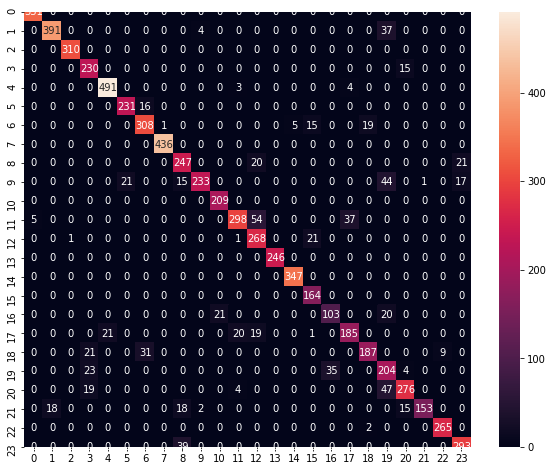

In [192]:
from sklearn.metrics import confusion_matrix
# Convert predictions classes to one hot vectors 
y_pred3 = np.argmax(results_3, axis = 1) 
# Convert validation observations to one hot vectors
y_actual3 = np.argmax(y_test3,axis = 1) 
# Create confusion matrix
conf_mtx3 = confusion_matrix(y_actual3, y_pred3) 
plt.figure(figsize=(10,8))
sns.heatmap(conf_mtx3, annot=True, fmt="d")#, ax = set_ylim((bottom, top)));

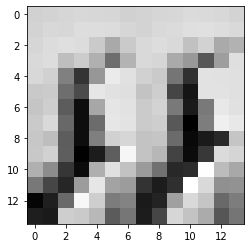

In [157]:
generate_image2(x_test3_mod[0])